# TRABAJO FINAL 

# Accidentes en Madrid

Alumno: Encarnación Carbonell Blasco

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import pyproj as proj
import warnings
import squarify
import seaborn as sns
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('BaseDatos_Accidentes.csv', encoding='utf-8')

In [18]:
df

,num_expediente,hora,cod_distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,x_utm,y_utm,mes,dia
0,2020S019534,4:30:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,adulto,mujer,sin asistencia,444976.463,4470508.259,1,4
1,2020S019534,4:30:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,adulto,hombre,leve,444976.463,4470508.259,1,4
2,2020S019534,4:30:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,joven,hombre,sin asistencia,444976.463,4470508.259,1,4
3,2020S019534,4:30:00,13.0,colisión fronto-lateral,despejado,turismo,pasajero,niños,hombre,sin asistencia,444976.463,4470508.259,1,4
4,2020S019534,4:30:00,13.0,colisión fronto-lateral,despejado,turismo,pasajero,adulto,mujer,sin asistencia,444976.463,4470508.259,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2021S001933,2:20:00,10.0,choque contra obstáculo fijo,despejado,turismo,conductor,joven,hombre,sin asistencia,438259.623,4473194.131,1,0
2997,2021S001933,2:20:00,10.0,choque contra obstáculo fijo,despejado,turismo,pasajero,adulto,hombre,leve,438259.623,4473194.131,1,0
2998,2021S001934,17:12:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,adulto,hombre,sin asistencia,443373.147,4472151.491,2,3
2999,2021S001934,17:12:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,mayor,hombre,sin asistencia,443373.147,4472151.491,2,3


# Google sheet

In [4]:
dt_accidentes = df.groupby(['tipo_accidente']).agg(num_accidentes = ('tipo_accidente', 'count'))
dt_accidentes = dt_accidentes.reset_index()

In [5]:
dt_accidentes

,tipo_accidente,num_accidentes
0,alcance,804
1,atropello a animal,7
2,atropello a persona,158
3,caída,234
4,choque contra obstáculo fijo,441
5,colisión frontal,69
6,colisión fronto-lateral,605
7,colisión lateral,390
8,colisión múltiple,265
9,solo salida de la vía,19


In [51]:
dt_accidentes.to_csv('Tipo_accidentes_g.csv', header=True, index=False)

In [6]:
dt_tipo_vehiculo = df.groupby(['tipo_vehiculo']).agg(num_accidentes = ('tipo_vehiculo', 'count'))
dt_tipo_vehiculo = dt_tipo_vehiculo.reset_index()

In [13]:
dt_tipo_vehiculo = dt_tipo_vehiculo.sort_values(by='num_accidentes', ascending=False )

In [14]:
dt_tipo_vehiculo

,tipo_vehiculo,num_accidentes
18,turismo,2063
11,furgoneta,230
14,motocicleta hasta 125cc,220
13,motocicleta > 125cc,127
7,camión rígido,107
2,autobús,49
8,ciclomotor,43
5,bicicleta,42
16,todo terreno,38
17,tractocamión,18


In [15]:
dt_tipo_vehiculo.to_csv('Tipo_vehiculo_g.csv', header=True, index=False)

# Seaborn

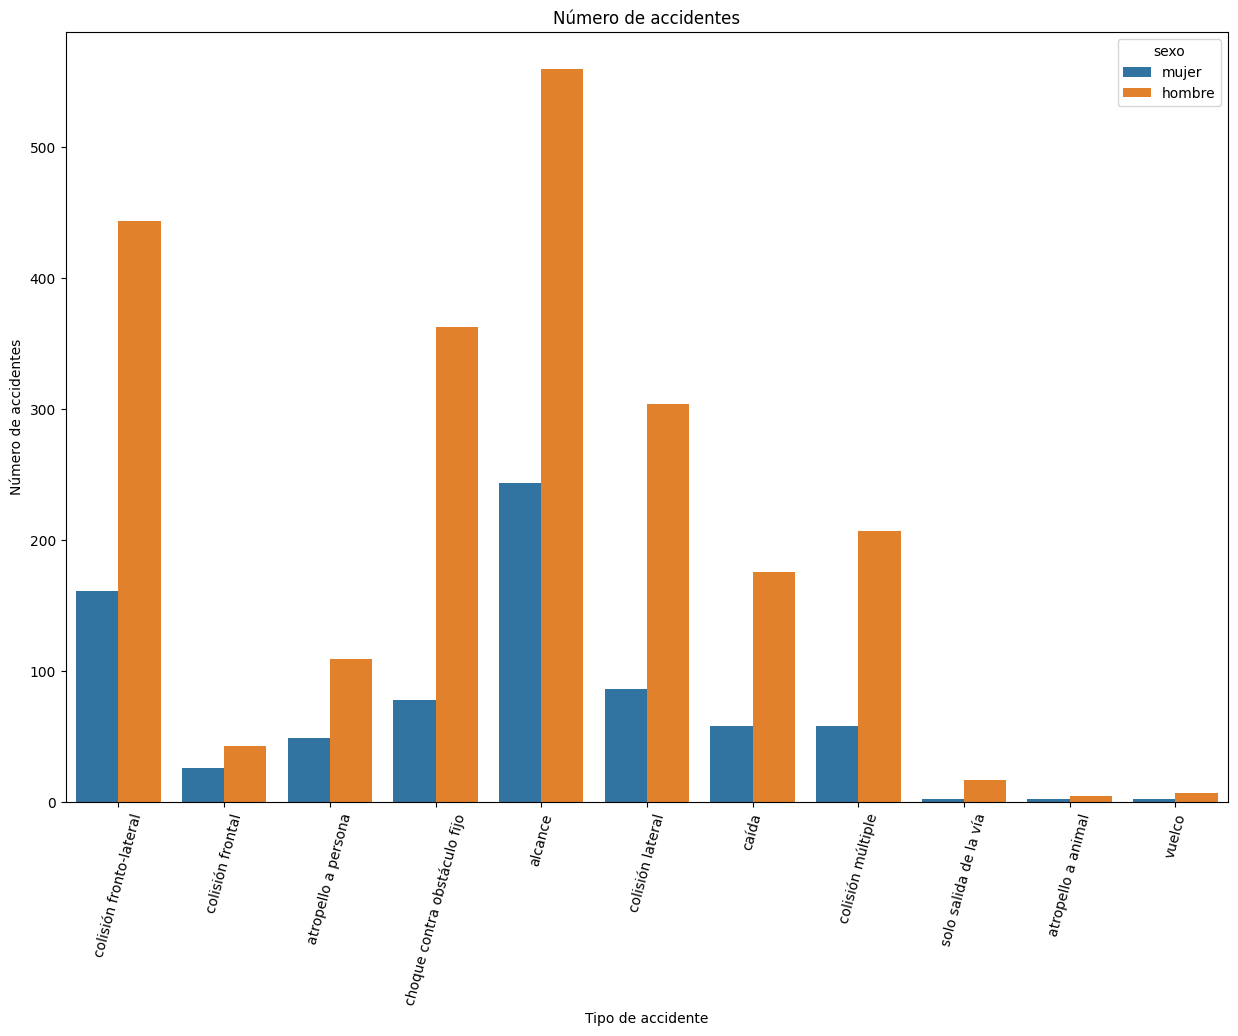

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.countplot(x='tipo_accidente', data=df, hue='sexo')
plt.xticks(rotation=75)
plt.xlabel('Tipo de accidente')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes')

plt.show()

## TreeMap


In [32]:
dt_accidentes

,tipo_accidente,num_accidentes
0,alcance,804
1,atropello a animal,7
2,atropello a persona,158
3,caída,234
4,choque contra obstáculo fijo,441
5,colisión frontal,69
6,colisión fronto-lateral,605
7,colisión lateral,390
8,colisión múltiple,265
9,solo salida de la vía,19


In [33]:
dt_accidentes['Porcentaje'] = (dt_accidentes['num_accidentes'] / dt_accidentes['num_accidentes'].sum())*100 

In [37]:
dt_accidentes.style.hide(axis="index").format(precision=2)

tipo_accidente,num_accidentes,Porcentaje
alcance,804,26.79
atropello a animal,7,0.23
atropello a persona,158,5.26
caída,234,7.80
choque contra obstáculo fijo,441,14.70
colisión frontal,69,2.30
colisión fronto-lateral,605,20.16
colisión lateral,390,13.00
colisión múltiple,265,8.83
solo salida de la vía,19,0.63


In [34]:
dt_accidentes

,tipo_accidente,num_accidentes,Porcentaje
0,alcance,804,26.791070
1,atropello a animal,7,0.233256
2,atropello a persona,158,5.264912
3,caída,234,7.797401
4,choque contra obstáculo fijo,441,14.695102
5,colisión frontal,69,2.299234
6,colisión fronto-lateral,605,20.159947
7,colisión lateral,390,12.995668
8,colisión múltiple,265,8.830390
9,solo salida de la vía,19,0.633122


In [44]:
t_accidente = dt_accidentes['tipo_accidente'].tolist()
Porcent = dt_accidentes['Porcentaje'].tolist()
n_accidentes = dt_accidentes['num_accidentes'].tolist()

In [64]:
t_accidente

['alcance',
 'an',
 'atropello a persona',
 'caída',
 'choque contra obstáculo fijo',
 'colisión frontal',
 'colisión fronto-lateral',
 'colisión lateral',
 'colisión múltiple',
 'sv',
 'v']

In [66]:
t_accidente[9] = 'sv'
t_accidente[10] = 'v'
t_accidente[1] = 'a'

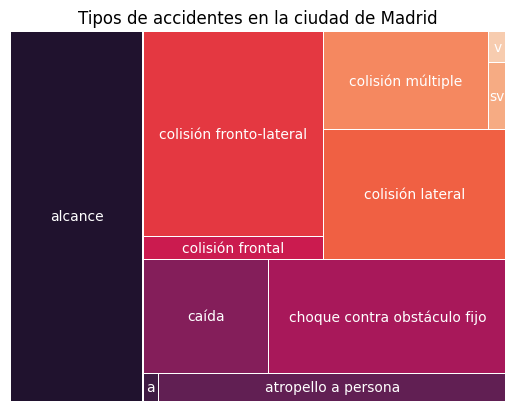

In [69]:
squarify.plot(sizes=n_accidentes, label=t_accidente, pad=0.2, norm_x= 800, norm_y=800, text_kwargs={'fontsize':10, 'color':'white'},
              color= sns.color_palette("rocket", len(n_accidentes)))

plt.title('Tipos de accidentes en la ciudad de Madrid')
plt.axis('off')
plt.show()


In [68]:
plt.savefig('treeMap.png')

<Figure size 640x480 with 0 Axes>

# Mapas

In [20]:
d = df[df['tipo_accidente'].isin(['alcance', 'colisión fronto-lateral', 'atropello a persona'])]
d

,num_expediente,hora,cod_distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,x_utm,y_utm,mes,dia
0,2020S019534,4:30:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,adulto,mujer,sin asistencia,444976.463,4470508.259,1,4
1,2020S019534,4:30:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,adulto,hombre,leve,444976.463,4470508.259,1,4
2,2020S019534,4:30:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,joven,hombre,sin asistencia,444976.463,4470508.259,1,4
3,2020S019534,4:30:00,13.0,colisión fronto-lateral,despejado,turismo,pasajero,niños,hombre,sin asistencia,444976.463,4470508.259,1,4
4,2020S019534,4:30:00,13.0,colisión fronto-lateral,despejado,turismo,pasajero,adulto,mujer,sin asistencia,444976.463,4470508.259,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,2021S001932,17:50:00,5.0,atropello a persona,despejado,turismo,conductor,joven,mujer,sin asistencia,442668.398,4479294.270,2,2
2992,2021S001932,17:50:00,5.0,atropello a persona,despejado,turismo,peatón,adulto,mujer,leve,442668.398,4479294.270,2,2
2998,2021S001934,17:12:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,adulto,hombre,sin asistencia,443373.147,4472151.491,2,3
2999,2021S001934,17:12:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,mayor,hombre,sin asistencia,443373.147,4472151.491,2,3


In [21]:
d.tipo_accidente.unique()

array(['colisión fronto-lateral', 'atropello a persona', 'alcance'],
      dtype=object)

In [22]:
d.dtypes

num_expediente           object
hora                     object
cod_distrito            float64
tipo_accidente           object
estado_meteorológico     object
tipo_vehiculo            object
tipo_persona             object
rango_edad               object
sexo                     object
lesividad                object
x_utm                   float64
y_utm                   float64
mes                       int64
dia                       int64
dtype: object

In [23]:
# Pasmar las dos coordenadas ficticas en el mapa de folium.
import folium



pj_target = proj.Proj(init='epsg:4326') # Sistema objetivo (folium)
pj_data  = proj.Proj(init='epsg:25830') # Sistema de origen (JSON)

x1= 444976.463
y1= 4470508.259
lon1, lat1 = proj.transform(pj_data, pj_target , x1,y1)


tooltip1='punto1'
tooltip2='punto2'


m = folium.Map(location=[lat1, lon1])
folium.Marker([lat1, lon1], icon=folium.Icon(color='red'), tooltip=tooltip1).add_to(m)
#folium.Marker([lat2, lon2], icon=folium.Icon(color='blue'), tooltip=tooltip2).add_to(m)
m

In [24]:
d.tail()

,num_expediente,hora,cod_distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,x_utm,y_utm,mes,dia
2991,2021S001932,17:50:00,5.0,atropello a persona,despejado,turismo,conductor,joven,mujer,sin asistencia,442668.398,4479294.270,2,2
2992,2021S001932,17:50:00,5.0,atropello a persona,despejado,turismo,peatón,adulto,mujer,leve,442668.398,4479294.270,2,2
2998,2021S001934,17:12:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,adulto,hombre,sin asistencia,443373.147,4472151.491,2,3
2999,2021S001934,17:12:00,13.0,colisión fronto-lateral,despejado,turismo,conductor,mayor,hombre,sin asistencia,443373.147,4472151.491,2,3
3000,2021S001935,21:40:00,16.0,alcance,lluvia débil,turismo,conductor,adolescente,mujer,sin asistencia,444876.028,4481321.125,2,6


In [25]:
d.tipo_accidente.unique()

array(['colisión fronto-lateral', 'atropello a persona', 'alcance'],
      dtype=object)

In [26]:

x= [element for element in d['x_utm'] ]
y= [element for element in d['y_utm']]


In [27]:
tipo_accidente = [element for element in d['tipo_accidente']]



        Longitud: -3.7025600
        Latitud: 40.4165000



1. CENTRO
2. ARGANZUELA
3. RETIRO
4. SALAMANCA
5. CHAMARTÍN
6. TETUÁN
7. CHAMBERÍ
8. FUENCARRAL-EL PARDO
9. MONCLOA-ARAVACA
10. LATINA
11. CARABANCHEL
12. USERA
13. PUENTE DE VALLECAS
14. MORATALAZ
15. CIUDAD LINEAL
16. HORTALEZA
17. VILLAVERDE
18. VILLA DE VALLECAS
19. VICÁLVARO
20. SAN BLAS-CANILLEJAS
21. BARAJAS

In [28]:
d.tipo_accidente.unique()

array(['colisión fronto-lateral', 'atropello a persona', 'alcance'],
      dtype=object)

In [31]:
# Inicializar al mapa cada localización

m2 = folium.Map(location=[40.4165000, -3.7025600])

# Agregar al mapa cada localización (lat, long)
for a, b, c in zip(x, y, tipo_accidente):
    long, lat = proj.transform(pj_data, pj_target, a,b)

    if c == 'colisión fronto-lateral':
        folium.Marker([lat, long], icon=folium.Icon(color='blue'), tooltip='Accidente: '+str(c)).add_to(m2)
    elif c == 'atropello a persona':
        folium.Marker([lat, long], icon=folium.Icon(color='red'), tooltip='Accidente: '+str(c)).add_to(m2)
    elif c == 'alcance':
        folium.Marker([lat, long], icon=folium.Icon(color='green'), tooltip='Accidente: '+str(c)).add_to(m2)
m2

In [ ]:
m2

In [30]:
m2.save('mapa.png')